In [1]:
import random
from math import sqrt
import numpy as np
import matplotlib.pyplot as plt

In [2]:

def initializePoints(count):
    points=[]
    for i in range(int(count/3)):
         points.append([random.gauss(0,10),random.gauss(100,10)])
    for i in range(int(count/3)):
         points.append([random.gauss(-30,20),random.gauss(10,10)])
    for i in range(int(count/3)):
         points.append([random.gauss(30,20),random.gauss(10,10)])

    return points


In [3]:
def cluster(points,K,visuals = True):
    
    centroids= random.sample(points,K)
    #print("initial centroids")
    #print(centroids)
    c1=centroids[0]
    c2=centroids[1]
    c3=centroids[2]
    change_c1=1000
    change_c2=1000
    change_c3=1000
    while(change_c1>=0.1 or change_c2>=0.1 or change_c3>=0.1):
        clusters=[]
        cluster1=[]
        cluster2=[]
        cluster3=[]
        for i in points:
            distance_c1 = sqrt(((i[0]-c1[0])**2) + ((i[1]-c1[1])**2))
            distance_c2 = sqrt(((i[0]-c2[0])**2) + ((i[1]-c2[1])**2))
            distance_c3 = sqrt(((i[0]-c3[0])**2) + ((i[1]-c3[1])**2))
            closest_distance = min(distance_c1,distance_c2,distance_c3)
            if (closest_distance == distance_c1):
                cluster1.append(i)
            elif (closest_distance == distance_c2):
                cluster2.append(i)
            elif (closest_distance == distance_c3):
                cluster3.append(i)
        
        clusters.append(cluster1)
        clusters.append(cluster2)
        clusters.append(cluster3)
        if visuals==True:
            plt.scatter(*zip(*cluster1))
            plt.scatter(*zip(*cluster2))
            plt.scatter(*zip(*cluster3))
            plt.scatter(*zip(*centroids))
            plt.show()

        
        c1_prev=c1
        c2_prev=c2
        c3_prev=c3
        
        sum_x=0
        sum_y=0
        for i in cluster1:
            sum_x+=i[0]
            sum_y+=i[1]
        average_cluster1_x=sum_x/len(cluster1)
        average_cluster1_y=sum_y/len(cluster1)

        sum_x=0
        sum_y=0
        for i in cluster2:
            sum_x+=i[0]
            sum_y+=i[1]
        average_cluster2_x=sum_x/len(cluster2)
        average_cluster2_y=sum_y/len(cluster2)

        sum_x=0
        sum_y=0
        for i in cluster3:
            sum_x+=i[0]
            sum_y+=i[1]
        average_cluster3_x=sum_x/len(cluster3)
        average_cluster3_y=sum_y/len(cluster3)

        c1=[average_cluster1_x,average_cluster1_y]
        c2=[average_cluster2_x,average_cluster2_y]
        c3=[average_cluster3_x,average_cluster3_y]
        change_c1=abs(c1[0]-c1_prev[0]) + abs(c1[1]-c1_prev[1])
        change_c2=abs(c2[0]-c2_prev[0]) + abs(c2[1]-c2_prev[1])
        change_c3=abs(c3[0]-c3_prev[0]) + abs(c3[1]-c3_prev[1])
        centroids=[]
        centroids.append(c1)
        centroids.append(c2)
        centroids.append(c3)
        
        #print(c1,c2,c3)
        #print(change_c1,change_c2,change_c3)
    #Your kmeans code will go here to cluster given points in K clsuters. If visuals = True, the code will also plot graphs to show the current state of clustering
    clusters.append(centroids)
    return clusters

In [4]:
def clusterQuality(clusters):
    
    score = -1
    #Your code to compute the quality of cluster will go here.
    #computing sse
    all_scores=[]
    for i in range(10):
        cluster=clusters[i]
        centroids=cluster[3]
        cluster1=cluster[0]
        cluster2=cluster[1]
        cluster3=cluster[2]
        sum1=0
        c1=centroids[0]
        for j in cluster1:
            sum1+=((j[0]-c1[0])**2)+((j[1]-c1[1])**2)
        sum2=0
        c2=centroids[1]
        for j in cluster2:
            sum2+=((j[0]-c2[0])**2)+((j[1]-c2[1])**2)
        sum3=0
        c3=centroids[2]
        for j in cluster3:
            sum3+=((j[0]-c3[0])**2)+((j[1]-c3[1])**2)
        sum=sum1+sum2+sum3
        all_scores.append(sum)
    #print(all_scores)
    ind = np.argmin(all_scores)
    print("best K means cluster is", ind+1)
    score=min(all_scores)
    return score

In [5]:
def keepClustering(points,K,N,visuals):
    clusters = []
    
    for i in range(10):
        print(i+1)
        #cluster_iteration=[]
        cluster_iteration=cluster(points, K, False)
        #print(cluster_iteration)
        #print("xxxxxxxxxxxxxxxxxxxxxxxxxx")
        clusters.append(cluster_iteration)
        #quality=clusterQuality(cluster_iteration)
        #print(quality)
        if visuals==True:
            plt.scatter(*zip(*cluster_iteration[0]))
            plt.scatter(*zip(*cluster_iteration[1]))
            plt.scatter(*zip(*cluster_iteration[2]))
            plt.scatter(*zip(*cluster_iteration[3]))
            
            plt.show()
            
    #Write you code to run clustering N times and return the formation having the best quality
    
    return clusters
    

1


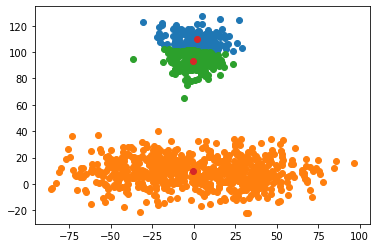

2


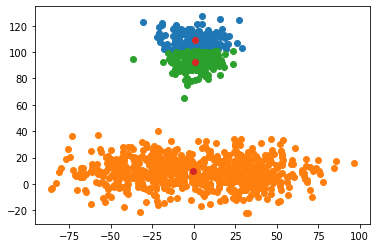

3


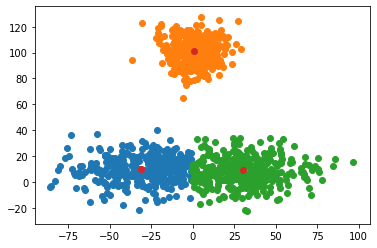

4


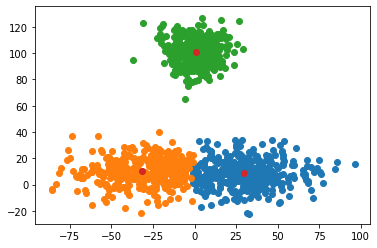

5


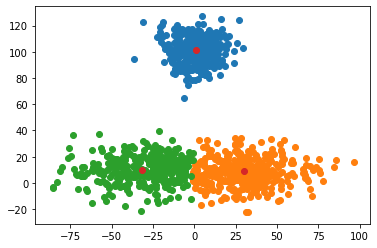

6


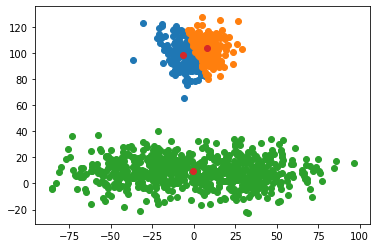

7


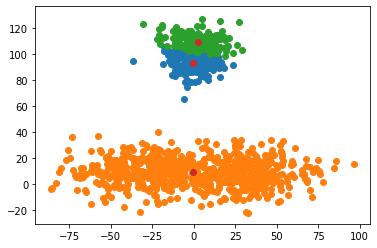

8


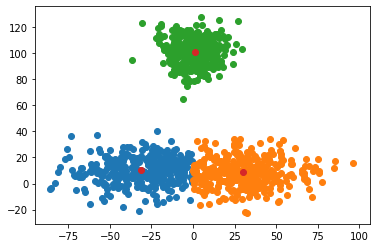

9


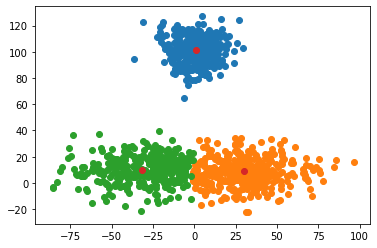

10


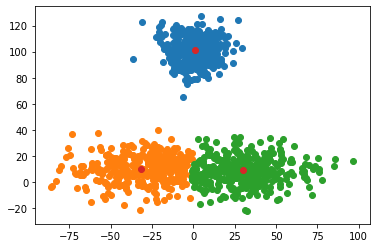

best K means cluster is 3
The score of best Kmeans clustering is: 382042.5737764261


In [6]:
K = 3
N = 10
points = initializePoints(1000)
#clusters = cluster(points, K)
clusters = keepClustering(points,K,N,True)
print ("The score of best Kmeans clustering is:", clusterQuality(clusters))
